In [261]:
import nltk

In [161]:
# !pip install tensorflow

In [262]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import re

In [163]:
data_original = pd.read_csv('Twitter_Data.csv')
data_original

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [164]:
data_original.isnull().sum()


clean_text    4
category      7
dtype: int64

In [165]:
data = data_original.copy()

In [166]:
data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [167]:
data.isnull().sum()


clean_text    4
category      7
dtype: int64

In [168]:
# Drop rows where either clean_text or category has NaN values
data = data.dropna(subset=['clean_text', 'category'])


In [169]:
data.isnull().sum()


clean_text    0
category      0
dtype: int64

In [170]:
# Check unique values in the 'category' column
print(data_cleaned['category'].unique())


[-1.  0.  1.]


In [171]:
# data['category'].replace(1, 'positive', inplace=True)
data['category'].replace({1: 'positive', 0: 'neutral', -1: 'negative'}, inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\886648224.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['category'].replace({1: 'positive', 0: 'neutral', -1: 'negative'}, inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\886648224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'].replace({1: 'positiv

In [172]:
data['clean_text']

0         when modi promised “minimum government maximum...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi  welcome bjp t...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
162975    why these 456 crores paid neerav modi not reco...
162976    dear rss terrorist payal gawar what about modi...
162977    did you cover her interaction forum where she ...
162978    there big project came into india modi dream p...
162979    have you ever listen about like gurukul where ...
Name: clean_text, Length: 162969, dtype: object

In [173]:
# Load the EMOTICONS_EMO dictionary from the file
import sys
sys.path.insert(0, 'D:/DSM/Assignment/3.Project_Twitter Sentimental Analysis/')
from emo_unicode import EMOTICONS_EMO
from emo_unicode import EMOJI_UNICODE
from emo_unicode import __all__


In [174]:
def replace_emoticons(text):
    # Replace emoticons in the text with their meanings
    for emoticon, meaning in EMOTICONS_EMO.items():
        # Use re.escape to escape special characters in emoticons
        text = re.sub(re.escape(emoticon), meaning, text)
    return text

# Example usage
text = "Hello :) How are you? :‑("
clean_text = replace_emoticons(text)
print(clean_text)

Hello Happy face or smiley How are you? Frown, sad, angry or pouting


In [175]:
text = "I am sad :()"
replace_emoticons(text)

'I am sad Frown, sad, angry or pouting)'

In [176]:
import re
from emo_unicode import EMOJI_UNICODE  

def replace_emojis(text):
    # Replace emojis in the text with their meanings
    for meaning, emoji in EMOJI_UNICODE.items():
        # Use re.escape to escape special characters in emojis
        text = re.sub(re.escape(emoji), meaning, text)
    return text

# Example usage
text_with_emojis = "Good morning 💖! Let's go for a walk 🚶‍♂️."
clean_text = replace_emojis(text_with_emojis)
print(clean_text)

Good morning :sparkling_heart:! Let's go for a walk :person_walking:‍:male_sign:️.


In [177]:
# data['clean_text'] = data['clean_text'].apply(replace_emoticons)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\2832120601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['clean_text'].apply(replace_emoticons)


In [178]:
# emoticons = "emoticons_removed.csv"
# data.to_csv(emoticons, index=False)


In [179]:
# data['clean_text'] = data['clean_text'].apply(replace_emojis)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\3743668206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['clean_text'].apply(replace_emojis)


In [180]:
# emoji = "emoji_removed.csv"
# data.to_csv(emoji, index=False)


In [181]:
english_stops = set(stopwords.words('english'))

In [182]:
english_stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

1. Convert to lower case

In [183]:
data['clean_text'] = data['clean_text'].str.lower()
data

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\3925427806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['clean_text'].str.lower()


,clean_text,category
0,when modi promised “minimum government maximum...,negative
1,talk all the nonsense and continue all the dra...,neutral
2,what did just say vote for modi welcome bjp t...,positive
3,asking his supporters prefix chowkidar their n...,positive
4,answer who among these the most powerful world...,positive
...,...,...
162975,why these 456 crores paid neerav modi not reco...,negative
162976,dear rss terrorist payal gawar what about modi...,negative
162977,did you cover her interaction forum where she ...,neutral
162978,there big project came into india modi dream p...,neutral


In [184]:
data['clean_text'].fillna('', inplace=True)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\3495459935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['clean_text'].fillna('', inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\3495459935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'].fillna('', inplace=True)


2.Remove HTML tags

In [185]:
def remove_tags(text):
    # Compiling a regex pattern to match HTML tags
    pattern = re.compile(r'<.*?>')
    # Removing the matched HTML tags from the input text
    return pattern.sub('', text)


In [186]:
data['clean_text'] = data['clean_text'].apply(remove_tags)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\356361529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['clean_text'].apply(remove_tags)


In [260]:
# data

3.Remove URLs

In [188]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [189]:
data['clean_text'] = data['clean_text'].apply(remove_url)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\3875691980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['clean_text'].apply(remove_url)


In [190]:
data

,clean_text,category
0,when modi promised “minimum government maximum...,negative
1,talk all the nonsense and continue all the dra...,neutral
2,what did just say vote for modi welcome bjp t...,positive
3,asking his supporters prefix chowkidar their n...,positive
4,answer who among these the most powerful world...,positive
...,...,...
162975,why these 456 crores paid neerav modi not reco...,negative
162976,dear rss terrorist payal gawar what about modi...,negative
162977,did you cover her interaction forum where she ...,neutral
162978,there big project came into india modi dream p...,neutral


4. Removing Punctuations


In [191]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [192]:
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [193]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,' ')
    return text

In [194]:
data['clean_text'] = data['clean_text'].apply(remove_punc)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\859749392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['clean_text'].apply(remove_punc)


5. Chat Words Treatment

In [258]:
chat_words = {}

with open('slang.txt', mode='r') as myfile:
    for line in myfile:
        if '=' in line:
            key, value = line.split('=', 1)
            chat_words[key.strip()] = value.strip()

# Check the dictionary to verify
print(chat_words)


{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'B4N': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great!', 'G9': 'Genius', 'IC': 'I See', 'ICQ': 'I Seek you (also a chat program)', 'ILU': 'ILU: I Love You', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laugh My A.. Off', 'LOL': 'Laug

In [259]:
chat_words

{'AFAIK': 'As Far As I Know',
 'AFK': 'Away From Keyboard',
 'ASAP': 'As Soon As Possible',
 'ATK': 'At The Keyboard',
 'ATM': 'At The Moment',
 'A3': 'Anytime, Anywhere, Anyplace',
 'BAK': 'Back At Keyboard',
 'BBL': 'Be Back Later',
 'BBS': 'Be Back Soon',
 'BFN': 'Bye For Now',
 'B4N': 'Bye For Now',
 'BRB': 'Be Right Back',
 'BRT': 'Be Right There',
 'BTW': 'By The Way',
 'B4': 'Before',
 'CU': 'See You',
 'CUL8R': 'See You Later',
 'CYA': 'See You',
 'FAQ': 'Frequently Asked Questions',
 'FC': 'Fingers Crossed',
 'FWIW': "For What It's Worth",
 'FYI': 'For Your Information',
 'GAL': 'Get A Life',
 'GG': 'Good Game',
 'GN': 'Good Night',
 'GMTA': 'Great Minds Think Alike',
 'GR8': 'Great!',
 'G9': 'Genius',
 'IC': 'I See',
 'ICQ': 'I Seek you (also a chat program)',
 'ILU': 'ILU: I Love You',
 'IMHO': 'In My Honest/Humble Opinion',
 'IMO': 'In My Opinion',
 'IOW': 'In Other Words',
 'IRL': 'In Real Life',
 'KISS': 'Keep It Simple, Stupid',
 'LDR': 'Long Distance Relationship',
 'LM

In [197]:
def chat_words_treatment(text):
    new_text = []
    words = text.split()
    
    for w in words:
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    
    return ' '.join(new_text)

In [198]:
data['clean_text'] = data['clean_text'].apply(chat_words_treatment)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\2602634632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['clean_text'].apply(chat_words_treatment)


6. Spelling Corrections..

In [199]:
# !pip install TextBlob
# from spellchecker import SpellChecker

In [200]:
# # https://norvig.com/spell-correct.html

# import re
# from collections import Counter

# def words(text): return re.findall(r'\w+', text.lower())

# # WORDS = Counter(words(open('big.txt').read()))
# WORDS = data['clean_text']

# def P(word, N=sum(WORDS.values())): 
#     "Probability of `word`."
#     return WORDS[word] / N

# def correction(word): 
#     "Most probable spelling correction for word."
#     return max(candidates(word), key=P)

# def candidates(word): 
#     "Generate possible spelling corrections for word."
#     return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

# def known(words): 
#     "The subset of `words` that appear in the dictionary of WORDS."
#     return set(w for w in words if w in WORDS)

# def edits1(word):
#     "All edits that are one edit away from `word`."
#     letters    = 'abcdefghijklmnopqrstuvwxyz'
#     splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
#     deletes    = [L + R[1:]               for L, R in splits if R]
#     transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
#     replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
#     inserts    = [L + c + R               for L, R in splits for c in letters]
#     return set(deletes + transposes + replaces + inserts)

# def edits2(word): 
#     "All edits that are two edits away from `word`."
#     return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [201]:
import re
from collections import Counter

def words(text):
    return re.findall(r'\w+', text.lower())

# Create a dictionary of word frequencies
WORDS = Counter(words(' '.join(data['clean_text'])))

def get_candidates(word):
    """Generate possible spelling corrections for word."""
    # Original word
    yield word
    
    # One-edit distance words
    letters = 'abcdefghijklmnopqrstuvwxyz'
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    
    # Deletions
    for L, R in splits:
        if R:
            yield L + R[1:]
    
    # Replacements
    for L, R in splits:
        if R:
            for c in letters:
                yield L + c + R[1:]
    
    # Insertions
    for L, R in splits:
        for c in letters:
            yield L + c + R

def correct_spelling(word):
    """Suggest the most probable spelling correction for word."""
    candidates = get_candidates(word)
    return max((c for c in candidates if c in WORDS), key=WORDS.get, default=word)

def spell_check_text(text):
    """Check spelling of all words in the given text."""
    words = text.split()
    corrected = [correct_spelling(word) for word in words]
    return ' '.join(corrected)

# Example usage
misspelled_text = "This is a smple exmple of misspeled wrds"
corrected_text = spell_check_text(misspelled_text)
print(f"Original: {misspelled_text}")
print(f"Corrected: {corrected_text}")

Original: This is a smple exmple of misspeled wrds
Corrected: this his at simple example off misspelled words


In [202]:
spell_check_text('spel')

'spell'

In [203]:

data['clean_text'] = data['clean_text'].apply(spell_check_text)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\2162592157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['clean_text'].apply(spell_check_text)


In [204]:
data['clean_text']

0         when modi promised minimum government maximum ...
1         talk all the nonsense and continue all the dra...
2         that did just says vote for modi welcome bjp o...
3         asking this supporters prefix chowkidar their ...
4         answer who among there the must powerful would...
                                ...                        
162975    who there 456 crore said neerav modi not recov...
162976    year rss terrorists pagal pawar that about mod...
162977     did you over here interaction form there the let
162978    there big project same into india modi dream p...
162979    have you even listen about like gurukul there ...
Name: clean_text, Length: 162969, dtype: object

In [205]:
import pandas as pd

# Creating a new DataFrame
spelling_corrected = pd.DataFrame({'corrected': data['clean_text']})


In [206]:
spelling_corrected['corrected']

0         when modi promised minimum government maximum ...
1         talk all the nonsense and continue all the dra...
2         that did just says vote for modi welcome bjp o...
3         asking this supporters prefix chowkidar their ...
4         answer who among there the must powerful would...
                                ...                        
162975    who there 456 crore said neerav modi not recov...
162976    year rss terrorists pagal pawar that about mod...
162977     did you over here interaction form there the let
162978    there big project same into india modi dream p...
162979    have you even listen about like gurukul there ...
Name: corrected, Length: 162969, dtype: object

In [207]:
spelling_corrected.to_csv('spelling.csv')

7.Removing Stop words

In [208]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [209]:
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return ' '.join(x)

In [210]:
data['clean_text'] = data['clean_text'].apply(remove_stopwords)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\2820148359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['clean_text'].apply(remove_stopwords)


In [211]:
data['clean_text']

0          modi promised minimum government maximum gove...
1             talk   nonsense  continue   drama  vote  modi
2            says vote  modi welcome bjp old  rahul  man...
3         asking  supporters prefix chowkidar  name modi...
4         answer  among   must powerful would leader tod...
                                ...                        
162975      456 crore said neerav modi  recovered  congr...
162976    year rss terrorists pagal pawar   modi killing...
162977                               interaction form   let
162978     big project   india modi dream project   happ...
162979      even listen  like gurukul  discipline  maint...
Name: clean_text, Length: 162969, dtype: object

In [212]:
# Creating a new DataFrame
stopwords_removed = pd.DataFrame({'stopword': data['clean_text']})
stopwords_removed['stopword']

0          modi promised minimum government maximum gove...
1             talk   nonsense  continue   drama  vote  modi
2            says vote  modi welcome bjp old  rahul  man...
3         asking  supporters prefix chowkidar  name modi...
4         answer  among   must powerful would leader tod...
                                ...                        
162975      456 crore said neerav modi  recovered  congr...
162976    year rss terrorists pagal pawar   modi killing...
162977                               interaction form   let
162978     big project   india modi dream project   happ...
162979      even listen  like gurukul  discipline  maint...
Name: stopword, Length: 162969, dtype: object

In [213]:
stopwords_removed.to_csv('stopwords_removed.csv')


8. Tokenization


In [214]:
data['clean_text']

0          modi promised minimum government maximum gove...
1             talk   nonsense  continue   drama  vote  modi
2            says vote  modi welcome bjp old  rahul  man...
3         asking  supporters prefix chowkidar  name modi...
4         answer  among   must powerful would leader tod...
                                ...                        
162975      456 crore said neerav modi  recovered  congr...
162976    year rss terrorists pagal pawar   modi killing...
162977                               interaction form   let
162978     big project   india modi dream project   happ...
162979      even listen  like gurukul  discipline  maint...
Name: clean_text, Length: 162969, dtype: object

In [215]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [216]:
# print(nltk.data.path)

In [217]:

# Re-download punkt
# nltk.download('punkt', download_dir=r'C:\Users\KIIT\AppData\Roaming\nltk_data')

In [218]:

# Re-download punkt
# nltk.download('punkt', download_dir=r'D:\DSM\Assignment\3.Project_Twitter Sentimental Analysis')

In [219]:
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int


In [220]:
# token = Tokenizer(lower = False)
# data['clean_text'] = token.texts_to_sequences(data['clean_text'])

In [222]:
def sent_tokenize(text,language="english"):
    return word_tokenize(text)

In [223]:
# data['clean_text'] = data['clean_text'].apply(sent_tokenize)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\4288043612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['clean_text'].apply(sent_tokenize)


In [224]:
data['clean_text']

0         [modi, promised, minimum, government, maximum,...
1             [talk, nonsense, continue, drama, vote, modi]
2         [says, vote, modi, welcome, bjp, old, rahul, m...
3         [asking, supporters, prefix, chowkidar, name, ...
4         [answer, among, must, powerful, would, leader,...
                                ...                        
162975    [456, crore, said, neerav, modi, recovered, co...
162976    [year, rss, terrorists, pagal, pawar, modi, ki...
162977                             [interaction, form, let]
162978    [big, project, india, modi, dream, project, ha...
162979    [even, listen, like, gurukul, discipline, main...
Name: clean_text, Length: 162969, dtype: object

In [225]:
# tokenized = "tokenized_text.csv"
# data.to_csv(tokenized, index=False)

In [226]:
data['clean_text']

0         [modi, promised, minimum, government, maximum,...
1             [talk, nonsense, continue, drama, vote, modi]
2         [says, vote, modi, welcome, bjp, old, rahul, m...
3         [asking, supporters, prefix, chowkidar, name, ...
4         [answer, among, must, powerful, would, leader,...
                                ...                        
162975    [456, crore, said, neerav, modi, recovered, co...
162976    [year, rss, terrorists, pagal, pawar, modi, ki...
162977                             [interaction, form, let]
162978    [big, project, india, modi, dream, project, ha...
162979    [even, listen, like, gurukul, discipline, main...
Name: clean_text, Length: 162969, dtype: object

In [323]:
tokenized = pd.read_csv('tokenized_text.csv')
tokenized

,clean_text,category
0,"['modi', 'promised', 'minimum', 'government', ...",negative
1,"['talk', 'nonsense', 'continue', 'drama', 'vot...",neutral
2,"['says', 'vote', 'modi', 'welcome', 'bjp', 'ol...",positive
3,"['asking', 'supporters', 'prefix', 'chowkidar'...",positive
4,"['answer', 'among', 'must', 'powerful', 'would...",positive
...,...,...
162964,"['456', 'crore', 'said', 'neerav', 'modi', 're...",negative
162965,"['year', 'rss', 'terrorists', 'pagal', 'pawar'...",negative
162966,"['interaction', 'form', 'let']",neutral
162967,"['big', 'project', 'india', 'modi', 'dream', '...",neutral


In [324]:
data = tokenized

In [325]:
data['clean_text']

0         ['modi', 'promised', 'minimum', 'government', ...
1         ['talk', 'nonsense', 'continue', 'drama', 'vot...
2         ['says', 'vote', 'modi', 'welcome', 'bjp', 'ol...
3         ['asking', 'supporters', 'prefix', 'chowkidar'...
4         ['answer', 'among', 'must', 'powerful', 'would...
                                ...                        
162964    ['456', 'crore', 'said', 'neerav', 'modi', 're...
162965    ['year', 'rss', 'terrorists', 'pagal', 'pawar'...
162966                       ['interaction', 'form', 'let']
162967    ['big', 'project', 'india', 'modi', 'dream', '...
162968    ['even', 'listen', 'like', 'gurukul', 'discipl...
Name: clean_text, Length: 162969, dtype: object

In [228]:
# import nltk
# nltk.download('all')


8. Stemming


In [329]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])



In [330]:
data['clean_text'] = data['clean_text'].apply(stem_words)

In [340]:
data['clean_text']

0         ['modi', 'promised', 'minimum', 'government', ...
1         ['talk', 'nonsense', 'continue', 'drama', 'vot...
2         ['says', 'vote', 'modi', 'welcome', 'bjp', 'ol...
3         ['asking', 'supporters', 'prefix', 'chowkidar'...
4         ['answer', 'among', 'must', 'powerful', 'would...
                                ...                        
162964    ['456', 'crore', 'said', 'neerav', 'modi', 're...
162965    ['year', 'rss', 'terrorists', 'pagal', 'pawar'...
162966                       ['interaction', 'form', 'let']
162967    ['big', 'project', 'india', 'modi', 'dream', '...
162968    ['even', 'listen', 'like', 'gurukul', 'discipl...
Name: clean_text, Length: 162969, dtype: object

In [284]:
# stemmed = "stemmed_text.csv"
# data.to_csv(stemmed, index=False)

In [345]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])


data["clean_text"] = data["clean_text"].apply(lambda text: stem_words(text))


In [348]:
print(stem_words('promised'))

promis


In [349]:
data['clean_text']

0         ['modi', 'promised', 'minimum', 'government', ...
1         ['talk', 'nonsense', 'continue', 'drama', 'vot...
2         ['says', 'vote', 'modi', 'welcome', 'bjp', 'ol...
3         ['asking', 'supporters', 'prefix', 'chowkidar'...
4         ['answer', 'among', 'must', 'powerful', 'would...
                                ...                        
162964    ['456', 'crore', 'said', 'neerav', 'modi', 're...
162965    ['year', 'rss', 'terrorists', 'pagal', 'pawar'...
162966                       ['interaction', 'form', 'let']
162967    ['big', 'project', 'india', 'modi', 'dream', '...
162968    ['even', 'listen', 'like', 'gurukul', 'discipl...
Name: clean_text, Length: 162969, dtype: object

8.Lemmatization


In [ ]:
# !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.5.0/en_core_web_sm-3.5.0.tar.gz


In [332]:
from nltk.stem import WordNetLemmatizer

In [333]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [334]:
data['clean_text'] = data['clean_text'].apply(lemmatize)

In [339]:
print(lemmatize('says'))

say


In [335]:
data['clean_text']

0         ['modi', 'promised', 'minimum', 'government', ...
1         ['talk', 'nonsense', 'continue', 'drama', 'vot...
2         ['says', 'vote', 'modi', 'welcome', 'bjp', 'ol...
3         ['asking', 'supporters', 'prefix', 'chowkidar'...
4         ['answer', 'among', 'must', 'powerful', 'would...
                                ...                        
162964    ['456', 'crore', 'said', 'neerav', 'modi', 're...
162965    ['year', 'rss', 'terrorists', 'pagal', 'pawar'...
162966                       ['interaction', 'form', 'let']
162967    ['big', 'project', 'india', 'modi', 'dream', '...
162968    ['even', 'listen', 'like', 'gurukul', 'discipl...
Name: clean_text, Length: 162969, dtype: object

In [350]:
data['category'].replace({'positive': 2, 'neutral' : 0, 'negative' : 1}, inplace=True)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\2773966980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['category'].replace({'positive': 2, 'neutral' : 0, 'negative' : 1}, inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_25768\2773966980.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [351]:
x_data = data['clean_text']
y_data = data['category']


In [35]:
# from keras.utils import to_categorical
# y_data = to_categorical(y_data)

<Axes: xlabel='category'>

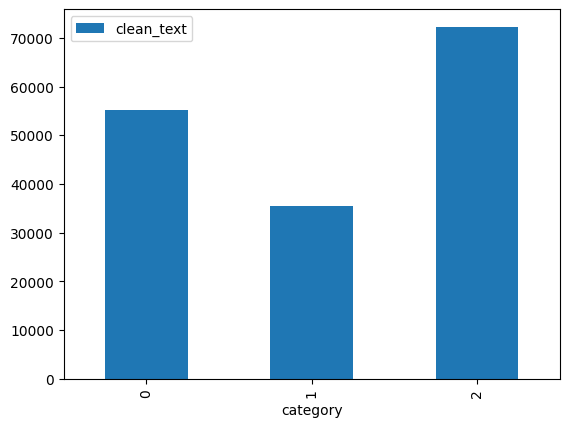

In [352]:
data.groupby('category').count().plot(kind='bar')


In [353]:
from sklearn.model_selection import train_test_split

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print('Train Set Shapes:')
print(f'X_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}\n')

print('Test Set Shapes:')
print(f'X_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}\n')

print('Sample X_train data:')
print(x_train[:5], '\n')  # Print the first 5 rows of x_train

print('Sample X_test data:')
print(x_test[:5], '\n')  # Print the first 5 rows of x_test


Train Set Shapes:
X_train shape: (130375,)
y_train shape: (130375,)

Test Set Shapes:
X_test shape: (32594,)
y_test shape: (32594,)

Sample X_train data:
63424     ['media', 'guys', 'even', 'think', 'straight',...
78454                                              ['name']
70128     ['space', 'debris', 'problem', 'aware', 'new',...
157068    ['today', 'interaction', 'modi', 'phenomenal',...
120884    ['modi', 'bjp', 'want', 'change', 'niti', 'gad...
Name: clean_text, dtype: object 

Sample X_test data:
42228     ['new', 'flash', 'modi', 'address', 'nation', ...
22034     ['according', 'congress', 'ecosystem', 'bjp', ...
79981     ['friends', 'guys', 'get', 'drdo', 'best', 'mo...
118492    ['modi', 'violate', 'model', 'come', 'conduct'...
12814     ['rahul', 'gandhi', 'asked', 'modi', 'nirav', ...
Name: clean_text, dtype: object 



In [354]:
print(np.unique(y_train))

[0 1 2]


In [355]:
print(np.unique(y_test))


[0 1 2]


In [356]:
from keras.utils import to_categorical

# One-hot encode the labels
y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)



In [357]:

# Print the shapes of the datasets
print('Train Set Shapes:')
print(f'X_train shape: {x_train.shape}')
print(f'y_train_onehot shape: {y_train_onehot.shape}\n')

print('Test Set Shapes:')
print(f'X_test shape: {x_test.shape}')
print(f'y_test_onehot shape: {y_test_onehot.shape}\n')

print('Sample X_train data:')
print(x_train[:5], '\n')  # Print the first 5 rows of x_train

print('Sample X_test data:')
print(x_test[:5], '\n')  # Print the first 5 rows of x_test


Train Set Shapes:
X_train shape: (130375,)
y_train_onehot shape: (130375, 3)

Test Set Shapes:
X_test shape: (32594,)
y_test_onehot shape: (32594, 3)

Sample X_train data:
63424     ['media', 'guys', 'even', 'think', 'straight',...
78454                                              ['name']
70128     ['space', 'debris', 'problem', 'aware', 'new',...
157068    ['today', 'interaction', 'modi', 'phenomenal',...
120884    ['modi', 'bjp', 'want', 'change', 'niti', 'gad...
Name: clean_text, dtype: object 

Sample X_test data:
42228     ['new', 'flash', 'modi', 'address', 'nation', ...
22034     ['according', 'congress', 'ecosystem', 'bjp', ...
79981     ['friends', 'guys', 'get', 'drdo', 'best', 'mo...
118492    ['modi', 'violate', 'model', 'come', 'conduct'...
12814     ['rahul', 'gandhi', 'asked', 'modi', 'nirav', ...
Name: clean_text, dtype: object 



In [358]:
print('Y Set\n')
print(y_train,'\n')
print('\n')
print(y_test,'\n')

Y Set

63424     2
78454     0
70128     2
157068    2
120884    2
         ..
119879    0
103694    0
131932    2
146867    2
121958    2
Name: category, Length: 130375, dtype: int64 



42228     0
22034     2
79981     1
118492    1
12814     0
         ..
47104     2
33631     1
93675     0
37756     0
132995    2
Name: category, Length: 32594, dtype: int64 



In [359]:
print('Y Set\n')
print(y_train_onehot,'\n')
print('\n')
print(y_test_onehot,'\n')

Y Set

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]] 



[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] 



In [360]:
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))
        
    return int(np.ceil(np.mean(review_length)))

In [361]:
get_max_length()

136

When to Use Each Method: <br><br>
Use Bag of Words if:<br>
You are working with traditional machine learning models (e.g., Logistic Regression, SVM).<br>
You do not need to capture the word order.<br><br>
Use pad_sequences if:<br>
You are working with deep learning models like LSTM, GRU, CNN, or other sequential models, which require a fixed sequence length.<br>
The order of words matters (e.g., for sentiment analysis, language modeling, or sequence prediction).<br>

In [362]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def encode_and_pad_tokens(x_train, x_test, max_words=10000, max_length=get_max_length()):
    """
    Encode tokenized and preprocessed text data, create sequences, and pad them.
    
    Args:
    x_train (list): List of tokenized training samples (list of lists)
    x_test (list): List of tokenized test samples (list of lists)
    max_words (int): Maximum number of words to keep in the vocabulary
    max_length (int): Maximum length of sequences (default is 140 based on your data)
    
    Returns:
    tuple: (padded_x_train, padded_x_test, tokenizer, total_words)
    """
    #  out-of-vocabulary (OOV).
    # Initialize and fit the Tokenizer
    tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
    tokenizer.fit_on_texts(x_train)
    
    # Convert tokens to sequences
    x_train_seq = tokenizer.texts_to_sequences(x_train)
    x_test_seq = tokenizer.texts_to_sequences(x_test)
    
    # Pad sequences
    padded_x_train = pad_sequences(x_train_seq, maxlen=max_length, padding='post', truncating='post')
    padded_x_test = pad_sequences(x_test_seq, maxlen=max_length, padding='post', truncating='post')
    
    # Get total words
    total_words = min(len(tokenizer.word_index) + 1, max_words)  # +1 for padding token
    
    
    return padded_x_train, padded_x_test, tokenizer, total_words



In [363]:
padded_x_train, padded_x_test, tokenizer, total_words = encode_and_pad_tokens(x_train, x_test)


In [364]:
# For binary classification, use int32 or float32
# For multi-class classification, use int32 for sparse labels or float32 for one-hot encoded labels
# For regression, use float32
print(padded_x_train.dtype)
print(padded_x_test.dtype)
print(y_train_onehot.dtype)
print(y_test_onehot.dtype)

int32
int32
float64
float64


In [365]:
# Convert both x_train and x_test to float
padded_x_train = padded_x_train.astype(np.float32)
padded_x_test = padded_x_test.astype(np.float32)
y_train_onehot = y_train_onehot.astype(np.float32)
y_test_onehot = y_test_onehot.astype(np.float32)

In [366]:
print(padded_x_train.dtype)
print(padded_x_test.dtype)
print(y_train_onehot.dtype)
print(y_test_onehot.dtype)

float32
float32
float32
float32


In [367]:
print('Encoded X Train\n', padded_x_train, '\n')
print('Encoded X Test\n', padded_x_test, '\n')
print('Total Words: ', total_words)

Encoded X Train
 [[7.700e+01 1.070e+02 2.400e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.140e+02 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.900e+01 1.479e+03 2.160e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [1.260e+02 2.270e+02 2.836e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [5.840e+02 4.310e+02 4.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.110e+02 1.370e+02 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]] 

Encoded X Test
 [[5.500e+01 5.170e+03 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [7.100e+02 9.000e+00 1.726e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.680e+02 1.070e+02 1.200e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [1.529e+03 2.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [8.520e+02 8.200e+01 3.800e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.000e+00 2.000e+00 1.740e+02 ... 0.000e+00 0.000e+00 0.000e+00]] 

Total Words:  10000


In [368]:
pd.DataFrame(padded_x_train)


,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,77.0,107.0,24.0,33.0,1978.0,775.0,104.0,531.0,2.0,334.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49.0,1479.0,216.0,550.0,55.0,2895.0,174.0,3.0,49.0,2307.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,67.0,1838.0,2.0,3616.0,347.0,2308.0,1220.0,24.0,8655.0,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,7.0,22.0,83.0,769.0,1180.0,8178.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130370,285.0,4777.0,88.0,2.0,1011.0,1.0,12.0,1.0,90.0,1262.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130371,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130372,126.0,227.0,2836.0,350.0,409.0,29.0,42.0,24.0,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130373,584.0,431.0,4.0,738.0,3324.0,910.0,402.0,2412.0,131.0,490.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [369]:
pd.DataFrame(padded_x_test)


,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,55.0,5170.0,2.0,130.0,30.0,9224.0,844.0,398.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,710.0,9.0,1726.0,7.0,828.0,523.0,8.0,359.0,13.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,268.0,107.0,12.0,79.0,39.0,2.0,75.0,779.0,7400.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,728.0,357.0,115.0,293.0,680.0,605.0,180.0,708.0,208.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.0,42.0,314.0,2.0,88.0,21.0,68.0,314.0,1300.0,153.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32589,681.0,4.0,497.0,1168.0,2.0,483.0,1360.0,5761.0,892.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,6.0,4.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,1529.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32592,852.0,82.0,380.0,2.0,17.0,1.0,3853.0,499.0,2.0,979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [370]:
print(padded_x_train.dtype)
print(padded_x_test.dtype)
print(y_train_onehot.dtype)
print(y_test_onehot.dtype)

float32
float32
float32
float32


In [371]:
print(padded_x_train.shape)
print(y_train_onehot.shape)

(130375, 136)
(130375, 3)


In [304]:
# results = []  # Use a new list for clarity
# for sequence in padded_x_test:
#     # Check if all elements in the sequence are integers
#     if all(isinstance(x, int) for x in sequence):
#         results.append(True)
#     else:
#         results.append(False)

# # You will have a list with True/False for each sequence in padded_x_test
# print(results)


In [305]:
# result = False  # Start with False

# for sequence in padded_x_test:
#     if any(x for x in sequence):  # Check if any element in the sequence is True (non-zero)
#         result = True  # If any True found, result becomes True
#         break  # No need to check further if we found a True value

# print(result)  # This will print True if any True-like element exists, otherwise False


In [372]:
max_length = get_max_length()
max_length

136

In [373]:
# from keras.layers import Input, Embedding, LSTM, Dense, Dropout
# from keras.models import Sequential
# from keras.optimizers import Adam


# EMBED_DIM = 32
# LSTM_OUT = 64

# model = Sequential([
#     Input(shape=(max_length,)),
#     Embedding(total_words, EMBED_DIM, input_length=max_length),
#     LSTM(LSTM_OUT, dropout=0.3, recurrent_dropout=0.3),
#     Dense(1, activation='sigmoid')
# ])

# optimizer = Adam(learning_rate=0.0001)

# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# print(model.summary())

In [374]:
# from keras.layers import Input, Embedding, LSTM, Dense, Dropout
# from keras.models import Sequential
# import tensorflow as tf

# EMBED_DIM = 32
# LSTM_OUT = 64

# def custom_activation(x):
#     return tf.cast(tf.argmax(x, axis=-1), dtype=tf.float32) - 1

# model = Sequential([
#     Input(shape=(max_length,)),
#     Embedding(total_words, EMBED_DIM, input_length=max_length),
#     LSTM(LSTM_OUT, dropout=0.3, recurrent_dropout=0.3),
#     Dense(3, activation='linear'),
#     tf.keras.layers.Lambda(custom_activation)
# ])

# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
# print(model.summary())

In [176]:
# from tensorflow.keras.layers import Embedding, LSTM, Dense
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.models import load_model

# checkpoint = ModelCheckpoint(
#     'models/LSTM.keras',
#     monitor='accuracy',
#     save_best_only=True,
#     verbose=1)

In [375]:
# from keras.layers import Input, Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Bidirectional
# from keras.models import Sequential
# from keras.optimizers import Adam
# from keras.metrics import Precision, Recall

# # Hyperparameters
# EMBED_DIM = 64  # Increased from 32
# LSTM_OUT = 128  # Increased from 64

# model = Sequential([
#     Input(shape=(max_length,)),
#     Embedding(total_words, EMBED_DIM, input_length=max_length),
#     Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
#     MaxPooling1D(pool_size=2),
#     Bidirectional(LSTM(LSTM_OUT, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
#     Bidirectional(LSTM(LSTM_OUT // 2, dropout=0.3, recurrent_dropout=0.3)),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

# optimizer = Adam(learning_rate=0.001)  # Increased learning rate

# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])
# print(model.summary())

# # Assume X_train, y_train, X_val, y_val are your training and validation data
# # history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

In [217]:
# from keras.models import Sequential
# from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
# from keras.metrics import Precision, Recall
# from keras.optimizers import SGD
# from keras.callbacks import LearningRateScheduler

# # Hyperparameters
# vocab_size = 5000
# embedding_size = 32
# epochs = 20
# learning_rate = 0.001
# decay_rate = learning_rate / epochs
# momentum = 0.8

# # Define the SGD optimizer
# sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# # Build model
# model = Sequential()
# model.add(Embedding(vocab_size, embedding_size, input_length=max_length))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Bidirectional(LSTM(32)))
# model.add(Dropout(0.4))
# model.add(Dense(3, activation='softmax'))  # 3 output classes: negative, neutral, positive

# # Compile the model
# model.compile(optimizer=sgd,
#               loss='categorical_crossentropy',
#               metrics=['accuracy', Precision(), Recall()])

# # Print model summary
# print(model.summary())

# # Define learning rate scheduler (optional)
# def lr_scheduler(epoch, lr):
#     if epoch < 10:
#         return lr
#     else:
#         return lr * 0.1

# scheduler = LearningRateScheduler(lr_scheduler)

# # Note: You would train the model like this:
# history = model.fit(X_train, y_train, 
#                     validation_data=(X_val, y_val),
#                     epochs=epochs, 
#                     batch_size=32,
#                     callbacks=[scheduler])

# # Evaluate the model (after training)
# test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=1)
# print(f"Test Accuracy: {test_accuracy:.4f}")
# print(f"Test Precision: {test_precision:.4f}")
# print(f"Test Recall: {test_recall:.4f}")

In [376]:
print(padded_x_train.shape)
print(y_train_onehot.shape)


(130375, 136)
(130375, 3)


In [379]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Input
from keras.metrics import Precision, Recall
from keras.optimizers import SGD

# Hyperparameters
vocab_size = 10000
embedding_size = 32
epochs = 20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

# Define the SGD optimizer
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# Build model
model = Sequential([
    Input(shape=(max_length,)),
    Embedding(vocab_size, embedding_size, input_length=max_length),
    Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(32)),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Print model summary
print(model.summary())

# Note: To train the model, you would use:
history = model.fit(padded_x_train, y_train_onehot, 
                    validation_split=0.2,
                    epochs=epochs, 
                    batch_size=32)

# To evaluate:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(padded_x_test, y_test_onehot, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 136, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 136, 32)        │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 68, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 339,939 (1.30 MB)

 Trainable params: 339,939 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
3260/3260 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.5800 - loss: 0.9075 - precision_2: 0.6436 - recall_2: 0.4277 - val_accuracy: 0.7664 - val_loss: 0.6161 - val_precision_2: 0.7849 - val_recall_2: 0.7418
Epoch 2/20
3260/3260 ━━━━━━━━━━━━━━━━━━━━ 90s 28ms/step - accuracy: 0.7733 - loss: 0.6010 - precision_2: 0.7958 - recall_2: 0.7433 - val_accuracy: 0.7827 - val_loss: 0.5634 - val_precision_2: 0.8016 - val_recall_2: 0.7575
Epoch 3/20
3260/3260 ━━━━━━━━━━━━━━━━━━━━ 96s 30ms/step - accuracy: 0.7881 - loss: 0.5662 - precision_2: 0.8084 - recall_2: 0.7591 - val_accuracy: 0.7888 - val_loss: 0.5522 - val_precision_2: 0.8102 - val_recall_2: 0.7621
Epoch 4/20
3260/3260 ━━━━━━━━━━━━━━━━━━━━ 87s 27ms/step - accuracy: 0.8045 - loss: 0.5264 - precision_2: 0.8254 - recall_2: 0.7772 - val_accuracy: 0.7890 - val_loss: 0.5520 - val_precision_2: 0.8082 - val_recall_2: 0.7681
Epoch 5/20
3260/3260 ━━━━━━━━━━━━━━━━━━━━ 87s 27ms/step - accuracy: 0.8188 - loss: 0.4957 - precision_2: 0.

In [383]:
# from keras.models import Sequential
# from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Input
# from keras.metrics import Precision, Recall
# from keras.optimizers import SGD

# # Hyperparameters
# vocab_size = 10000
# embedding_size = 32
# epochs = 20
# learning_rate = 0.001
# decay_rate = learning_rate / epochs
# momentum = 0.8

# # Define the SGD optimizer
# sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# # Build model
# model = Sequential([
#     Input(shape=(max_length,)),
#     Embedding(vocab_size, embedding_size, input_length=max_length),
#     Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
#     MaxPooling1D(pool_size=2),
#     Bidirectional(LSTM(32)),
#     Dropout(0.4),
#     Dense(3, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer=sgd,
#               loss='categorical_crossentropy',
#               metrics=['accuracy', Precision(), Recall()])

# # Print model summary
# print(model.summary())


c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 136, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 136, 32)        │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 68, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 339,939 (1.30 MB)

 Trainable params: 339,939 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

None


In [384]:
# from tensorflow.keras.layers import Embedding, LSTM, Dense
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.models import load_model

# checkpoint = ModelCheckpoint(
#     'models/LSTM.keras',
#     monitor='accuracy',
#     save_best_only=True,
#     verbose=1)

In [389]:
# model.fit(padded_x_train, y_train_onehot, batch_size = 64, epochs = 10, callbacks=[checkpoint])

In [390]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # predictions = model.predict(padded_x_test)

# # Normalize predictions (threshold of 0.5)
# # normalized_predictions = (predictions >= 0.5).astype(int)

# # Measure performance metrics
# accuracy = accuracy_score(padded_x_test, y_test_onehot)
# precision = precision_score(padded_x_test, y_test_onehot)
# recall = recall_score(padded_x_test, y_test_onehot)
# f1 = f1_score(padded_x_test, y_test_onehot)
  
# # Print performance metrics
# print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1-Score: {f1}")


In [393]:
model.predict(padded_x_test)

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


array([[0.43383253, 0.17561305, 0.39055446],
       [0.18520503, 0.27510536, 0.5396896 ],
       [0.12540895, 0.30616415, 0.5684269 ],
       ...,
       [0.7101931 , 0.08496027, 0.20484652],
       [0.12428288, 0.30786735, 0.56784976],
       [0.36034134, 0.20065418, 0.43900448]], dtype=float32)

In [396]:
import numpy as np

def normalize_predictions(predictions, threshold=0.5):
    """
    Normalize the model's predictions to binary format.
    
    Args:
    predictions (numpy.ndarray): The model's raw predictions.
    threshold (float): The threshold for classification (default is 0.5).
    
    Returns:
    numpy.ndarray: Normalized binary predictions (0 or 1).
    """
    # Convert to binary predictions
    binary_predictions = (predictions >= threshold).astype(int)
    
    return binary_predictions

raw_predictions = model.predict(padded_x_test)

# Normalize the predictions
normalized_predictions = normalize_predictions(raw_predictions)

print("Distribution of predictions:")
print(np.unique(normalized_predictions, return_counts=True))

from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test_onehot, normalized_predictions))


1019/1019 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step
Distribution of predictions:
(array([0, 1]), array([76601, 21181], dtype=int64))

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.38      0.47     11067
           1       0.00      0.00      0.00      7152
           2       0.55      0.55      0.55     14375

   micro avg       0.57      0.37      0.45     32594
   macro avg       0.39      0.31      0.34     32594
weighted avg       0.45      0.37      0.40     32594
 samples avg       0.37      0.37      0.37     32594



c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
